## Normalized Absorption Spectra per lamda LHCII

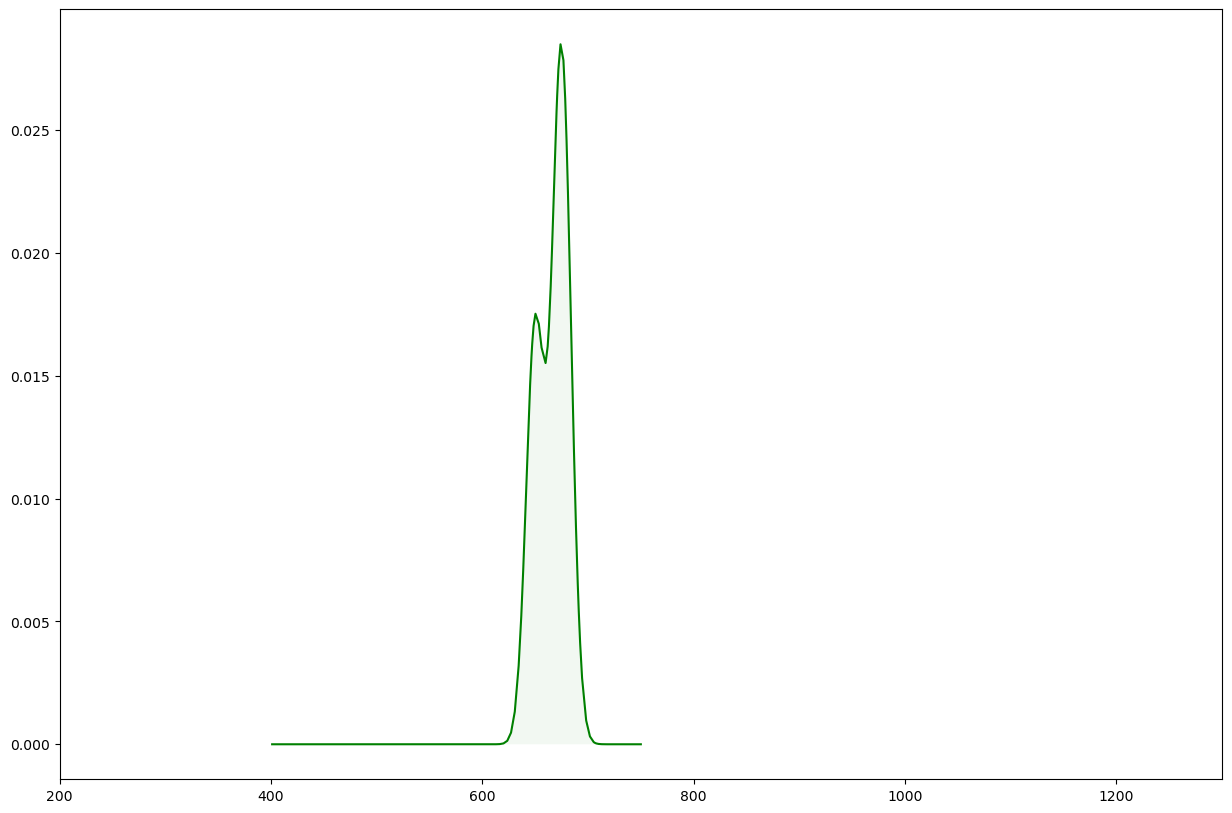

Trapezium Integration: 0.9997439205891263


In [15]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math

#Defining approximate Gaussian values
A1 = 0.43
A2 = 0.75
mu1 = 650
mu2 = 675
sigma1 = 8.5
sigma2 = 9

N = 25.4958832728171

res = 1 

spec_1 = []  
spec_2 = [] 
counter = 0 

fin = open('A*perlamda_LHCII.txt', 'r') 
fout = open('A_Norm_perlamda_LHCII.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N* (((A1/float(elements[0]))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2))))) + (A2/float(elements[0]))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2)))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_1.append(wavelength) 
        spec_2.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

#ax.set_title('LHCII Normalized Absorption Spectra (per lamda)', fontsize=20) 
#ax.set_ylabel('Amplitude ($au$)', fontsize=14)
#ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_1,spec_2,linestyle='-',color='g')
ax.fill_between(spec_1,spec_2,0,facecolor='g',alpha=0.05)

ax.set_xlim(2.0e+02, 1.3e+03)

plt.savefig('A_Norm_perlamda_LHCII.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

##Integral
print('Trapezium Integration:', np.trapz(spec_2, spec_1))

fout.close() 
fin.close() 

## Interpolation

interped y value at x = 650: 0.017449058546614108
interped y value at x = 1000: -1.630559461071751e-07


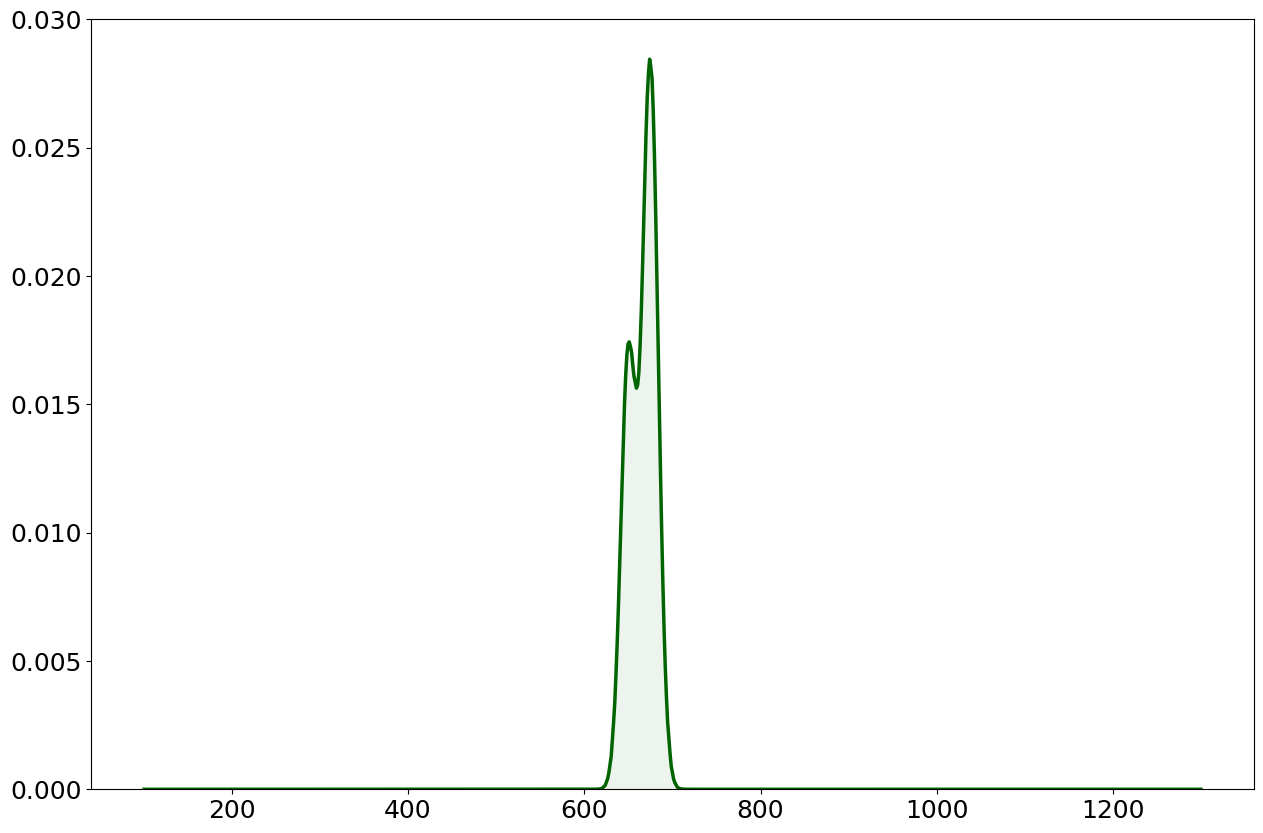

In [16]:
#allows you to calculate y for typed-in x when that x isn't in dataset)

#Method 1

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f = interp1d(spec_1,spec_2,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x = [] #create empty array for fp_x
fp_y = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LHCII_out = open('LHCII_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x.append(wavelength) #add floater wavelengths to fp_x array
    fp_y.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp = fp_x #lines up the to-be-new LH2 x axis with the fp x axis (200nm-1200nm) 
y_interp = abs(y_f(x_interp)) #new LH2 y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp): #for each x value in the 200-1200nm range
    LHCII_out.write(str(line)+'\t'+str(abs(y_interp[i]))+'\n') #write out y value = LH2_out, reconverting floats to strings
    
LHCII_out.close()

print('interped y value at x = 650:', y_f(650))
print('interped y value at x = 1000:', y_f(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
#ax.set_title('LHCII Normalized Absorption Spectra (per lamda) across fp ranges', fontsize=20) 
#ax.set_ylabel('Amplitude', fontsize=14)
#ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

#ax.scatter(spec_1,spec_2,color='k',label='LHCII antenna absorption',s=10) #plot scattter of current LH2 absorption curve (SMALL RANGE)
ax.plot(x_interp,y_interp,color='darkgreen',linewidth=2.5,label='Interpolated/Extrapolated LHCII antenna absorption') #plot interped/extraped x and y for LH2 absorption across fp_2800K range (FP_2800K RANGE!)
ax.fill_between(x_interp,y_interp,0,facecolor='darkgreen',alpha=0.07)

#ax.set_xlim(6.0e+02, 7.2e+02)
ax.set_ylim(0, 0.03)


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

#plt.legend()

plt.savefig('LHCII_interp.png') 
plt.show() 

# Normalized LHCII Chl B

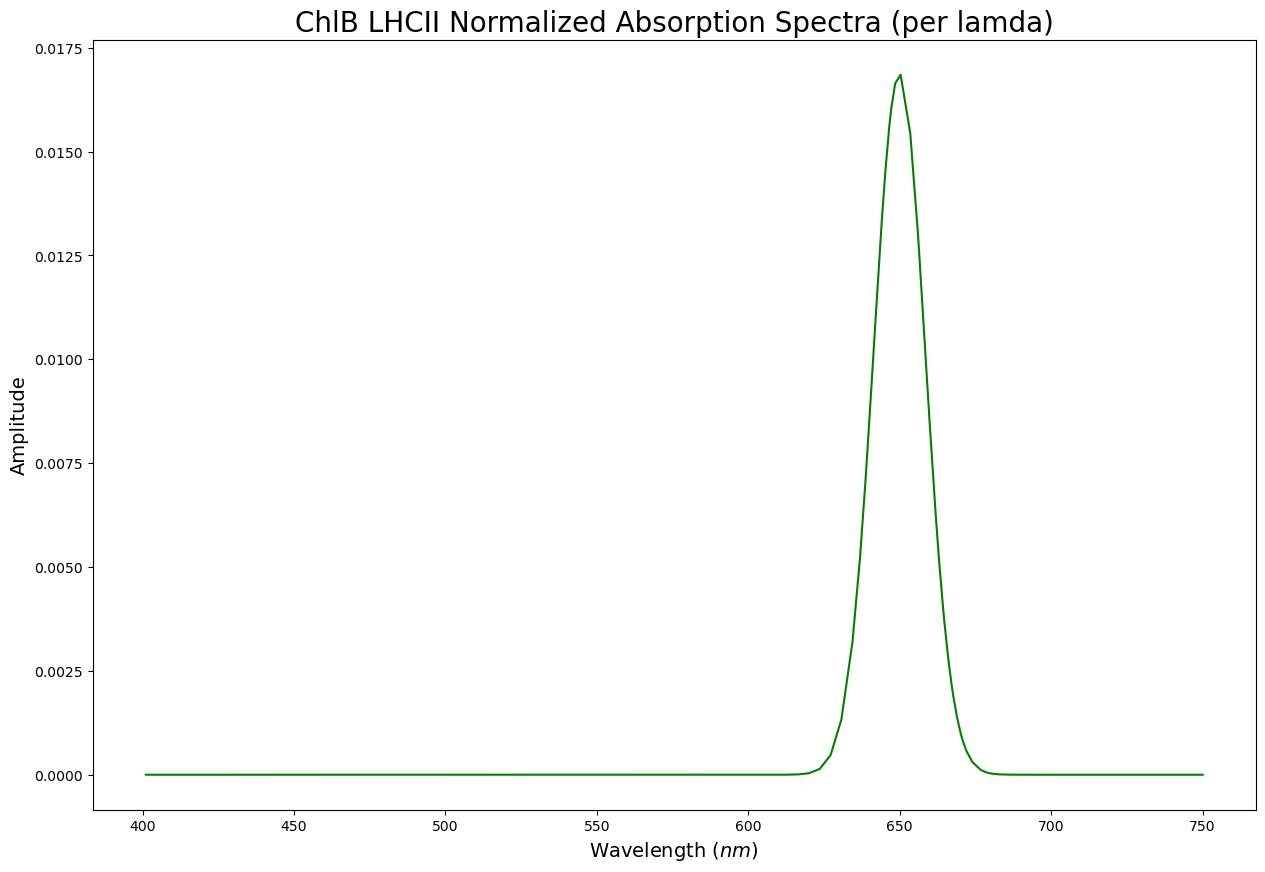

In [17]:
res = 1 

spec_A = []  
spec_B = [] 
counter = 0

fin = open('A*perlamda_LHCII_chlb.txt', 'r') 
fout = open('A_Norm_perlamda_LHCII_chlb.txt','w') 


for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*(((A1/float(elements[0]))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2)))))) 
    
    counter = counter + 1
    
    if counter%res == 0: 
        spec_A.append(wavelength) 
        spec_B.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('ChlB LHCII Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_A,spec_B,linestyle='-',color='g')
plt.savefig('A_Norm_perlamda_LHCII_chl.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

interped y value at x = 800: -2.704623689944e-18
interped y value at x = 1000: -1.3523118449720052e-17


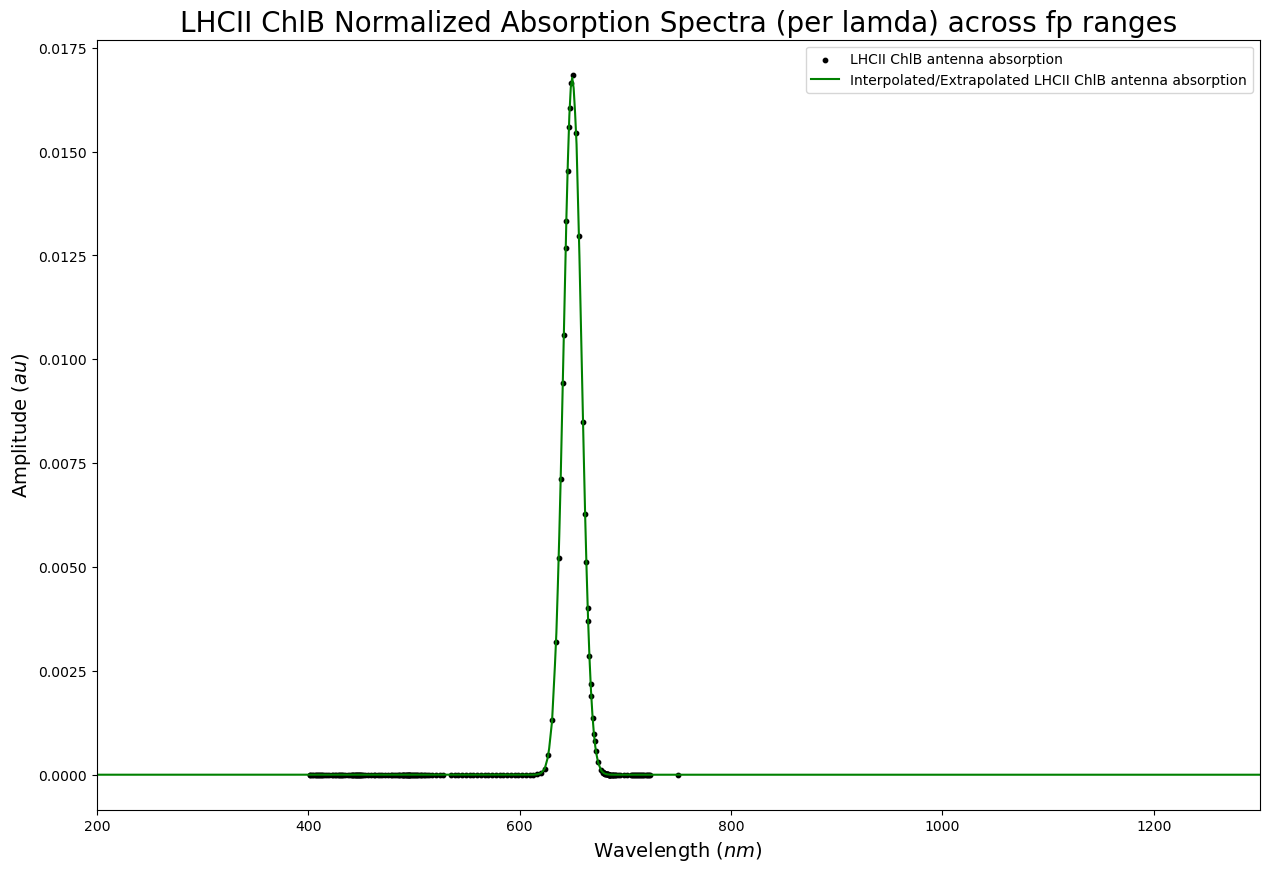

In [18]:
# Interped ChlB LHCII

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f_chlb = interp1d(spec_A,spec_B,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x_chlb = [] #create empty array for fp_x
fp_y_chlb = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LHCII_chlb_out = open('LHCII_chlb_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x_chlb.append(wavelength) #add floater wavelengths to fp_x array
    fp_y_chlb.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp_chlb = fp_x_chlb #lines up the to-be-new LHCII x axis with the fp x axis (200nm-1200nm) 
y_interp_chlb = abs(y_f_chlb(x_interp_chlb)) #new LHCII y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp_chlb): #for each x value in the 200-1200nm range
    LHCII_chlb_out.write(str(line)+'\t'+str(abs(y_interp_chlb[i]))+'\n') #write out y value = LHCII_out, reconverting floats to strings
    
LHCII_chlb_out.close()

print('interped y value at x = 800:', y_f_chlb(800))
print('interped y value at x = 1000:', y_f_chlb(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('LHCII ChlB Normalized Absorption Spectra (per lamda) across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_A,spec_B,color='k',label='LHCII ChlB antenna absorption',s=10) #plot scattter of current LH2 absorption curve (SMALL RANGE)
ax.plot(x_interp_chlb,y_interp_chlb,color='g',label='Interpolated/Extrapolated LHCII ChlB antenna absorption') #plot interped/extraped x and y for LH2 absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.3e+03)

plt.legend()
plt.savefig('LHCII_chlb_interp.png') 
plt.show() 

# Normalized LHCII Chl A

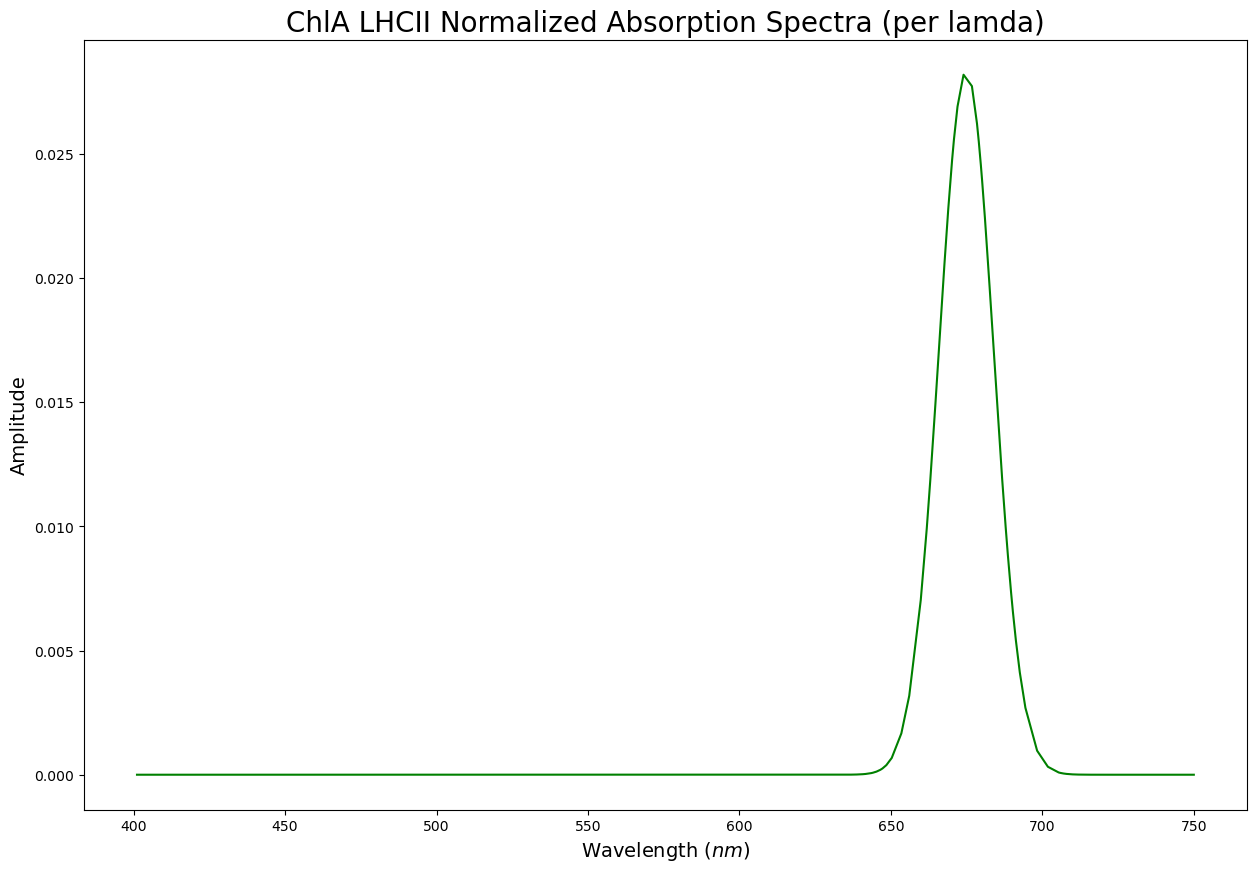

In [19]:
res = 1 

spec_C = []  
spec_D = [] 
counter = 0

fin = open('A*perlamda_LHCII_chla.txt', 'r') 
fout = open('A_Norm_perlamda_LHCII_chla.txt','w') 


for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*(((A2/float(elements[0]))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2)))))) 
    
    counter = counter + 1
    
    if counter%res == 0: 
        spec_C.append(wavelength) 
        spec_D.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('ChlA LHCII Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_C,spec_D,linestyle='-',color='g')
plt.savefig('A_Norm_perlamda_LHCII_chla.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

interped y value at x = 800: -3.261118920175225e-08
interped y value at x = 1000: -1.6305594609365203e-07


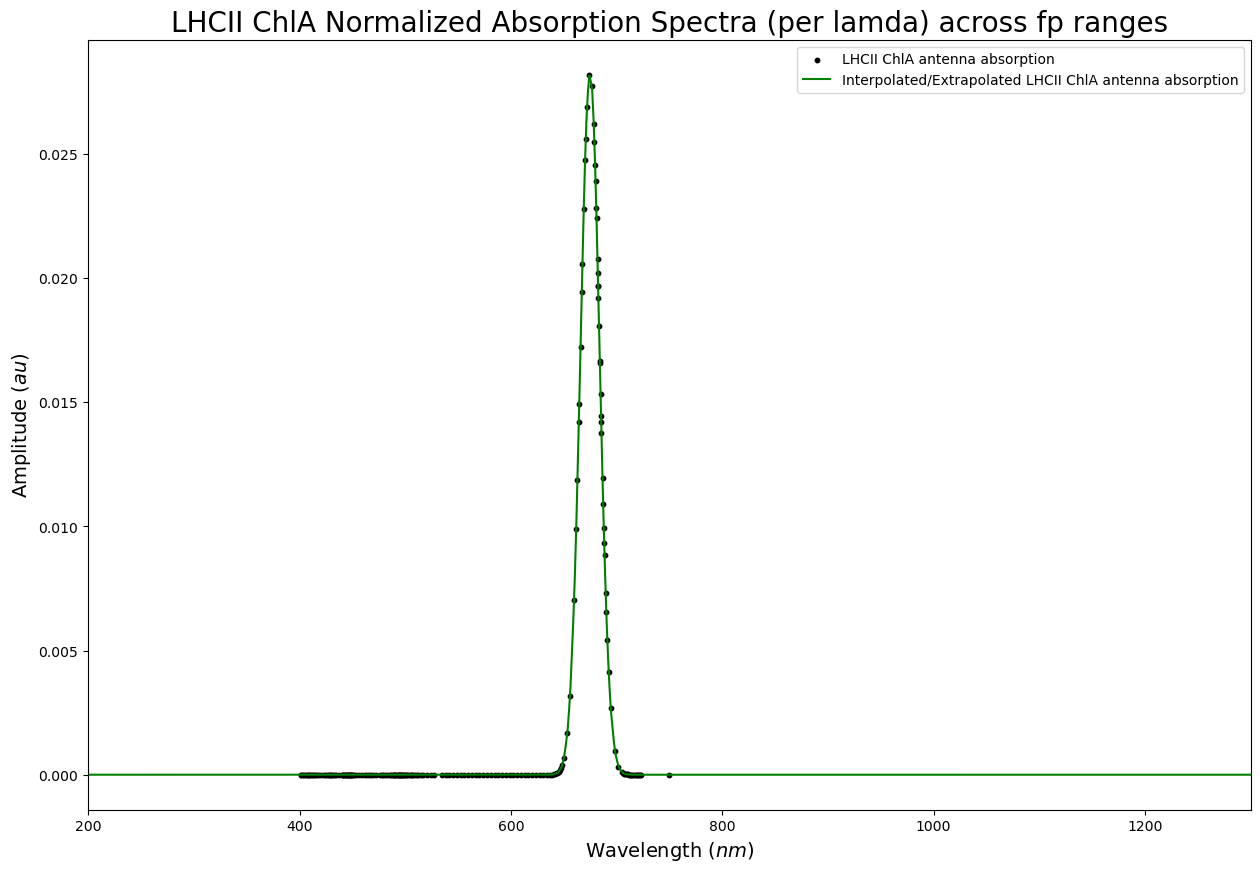

In [20]:
# Interped ChlA LHCII

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f_chla = interp1d(spec_C,spec_D,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x_chla = [] #create empty array for fp_x
fp_y_chla = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LHCII_chla_out = open('LHCII_chla_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x_chla.append(wavelength) #add floater wavelengths to fp_x array
    fp_y_chla.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp_chla = fp_x_chla #lines up the to-be-new LHCII x axis with the fp x axis (200nm-1200nm) 
y_interp_chla = abs(y_f_chla(x_interp_chla)) #new LHCII y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp_chla): #for each x value in the 200-1200nm range
    LHCII_chla_out.write(str(line)+'\t'+str(abs(y_interp_chla[i]))+'\n') #write out y value = LHCII_out, reconverting floats to strings
    
LHCII_chla_out.close()

print('interped y value at x = 800:', y_f_chla(800))
print('interped y value at x = 1000:', y_f_chla(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('LHCII ChlA Normalized Absorption Spectra (per lamda) across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_C,spec_D,color='k',label='LHCII ChlA antenna absorption',s=10) #plot scattter of current LH2 absorption curve (SMALL RANGE)
ax.plot(x_interp_chla,y_interp_chla,color='g',label='Interpolated/Extrapolated LHCII ChlA antenna absorption') #plot interped/extraped x and y for LH2 absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.3e+03)

plt.legend()
plt.savefig('LHCII_chla_interp.png') 
plt.show() 